In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

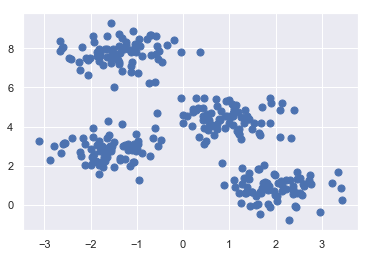

In [11]:
from sklearn.datasets.samples_generator import make_blobs
X, y_true = make_blobs(n_samples=300, centers=4,
                      cluster_std=0.6, random_state =0)
plt.scatter( X[:, 0], X[:, 1], s = 50)

In [12]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

(4, 2)


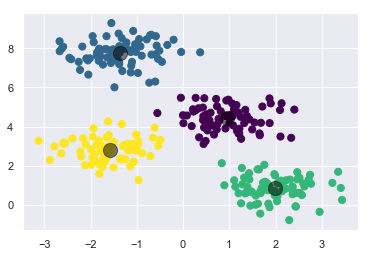

In [13]:
plt.scatter( X[:, 0], X[:, 1], c = y_kmeans, s = 50, cmap ='viridis')

centers = kmeans.cluster_centers_
print(centers.shape)
plt.scatter(centers[:, 0], centers[:, 1], c ='black', s=200, alpha=0.5)

#### Code k-Means

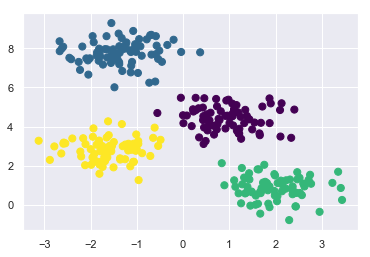

In [14]:
from sklearn.metrics import pairwise_distances_argmin

def find_cluster(X, n_clusters, rseed = 2):
    # 1. Randomly choose clusters
    rng = np.random.RandomState(rseed)
    i = rng.permutation(X.shape[0])[:n_clusters]
    centers = X[i]
    
    while True:
        # 2a. Assign labels based on closest center
        labels = pairwise_distances_argmin(X, centers)
        
        # 2b. Find new centers from means of points
        new_centers = np.array([X[labels==i].mean(0) for i in range(n_clusters)])
        
        if np.all(centers == new_centers):
            break
        centers = new_centers
    return centers , labels

centers, labels = find_cluster(X, 4)
plt.scatter(X[:,0], X[:, 1], c = labels, s =50, cmap = 'viridis')

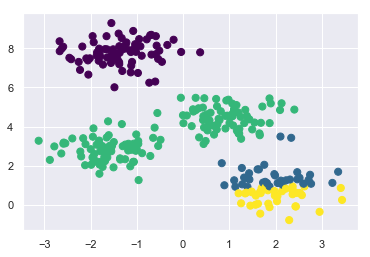

In [20]:
centers, labels = find_cluster(X, 4, rseed=0)
plt.scatter(X[:,0], X[:, 1], c = labels, s =50, cmap = 'viridis')
## МНогое зависит от первоначального расположения центра, т.е от инициализации!!!

#### Limitation of k-Means:  
- The globally result may not be achieved
- The number of clusters must be beforehand
- is limited to linear cluster boundaries
- Can be slow for a large numbers of samples


In [21]:
from sklearn.datasets import make_moons
X, y = make_moons(200, noise= 0.05, random_state = 0)


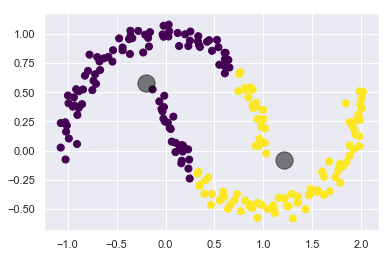

In [27]:
kmeans = KMeans(2, random_state=0)
labels = kmeans.fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels, s = 50, cmap = 'viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c ='black', s=300, alpha=0.5)

D:\Anaconda_3\lib\site-packages\sklearn\manifold\spectral_embedding_.py:237: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


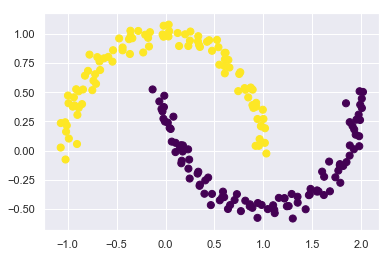

In [33]:
from sklearn.cluster import SpectralClustering
model = SpectralClustering(n_clusters=2, affinity='nearest_neighbors',
                          assign_labels='kmeans')
labels = model.fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c =labels, s=50, cmap = 'viridis')

# Example

#### Example 1. k-Means on digit

In [34]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

(1797, 64)

In [35]:
kmeans = KMeans(n_clusters=10, random_state=0)
clusters = kmeans.fit_predict(digits.data)
kmeans.cluster_centers_.shape

(10, 64)

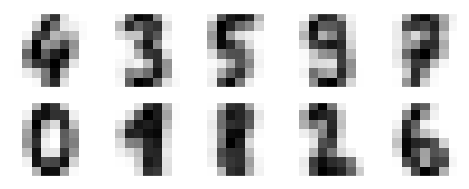

In [40]:
fig, ax = plt.subplots(2, 5, figsize = (8,3))
centers = kmeans.cluster_centers_.reshape(-1, 8, 8)
for axi, center in zip(ax.flat, centers):
    axi.set(xticks=[], yticks=[])
    axi.imshow(center, interpolation='nearest', cmap = 'binary')

*Even without labels* kMeanes is able to findd clusters

In [66]:
from scipy.stats import mode
labels = np.zeros_like(clusters)
for i in range(10):
    #Приписыаем реальные значения. которые в большинстве своем случается. Для каждого кластера
    mask = (clusters == i)
    labels[mask] = mode(digits.target[mask])[0]
    print(labels[mask].shape)


(166,)
(176,)
(149,)
(250,)
(206,)
(179,)
(90,)
(224,)
(175,)
(182,)


In [63]:
from sklearn.metrics import accuracy_score
accuracy_score(digits.target, labels)

0.7935447968836951

Text(80.90000000000006, 0.5, 'predicted label')

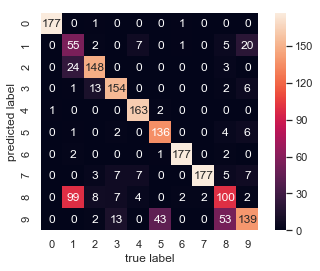

In [67]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(digits.target, labels)
sns.heatmap(mat.T, square = True, annot = True, fmt = 'd',
           xticklabels = digits.target_names,
           yticklabels = digits.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label')

Accuracy of our model:  0.9398998330550918


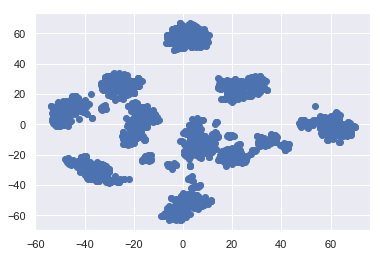

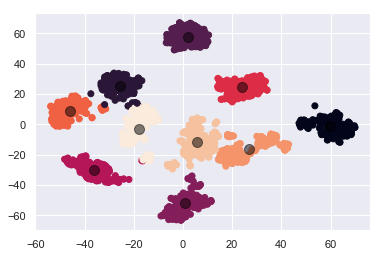

In [80]:
from sklearn.manifold import TSNE

#Project data
tsne = TSNE(n_components=2, init = 'pca', random_state=0)
digits_proj = tsne.fit_transform(digits.data)
plt.scatter(digits_proj[:, 0], digits_proj[:, 1], )

# Compute the clusters
kmeans = KMeans (n_clusters=10, random_state=0)
clusters = kmeans.fit_predict(digits_proj)
centers = kmeans.cluster_centers_

plt.figure()
plt.scatter(digits_proj[:, 0], digits_proj[:, 1], c = clusters )
plt.scatter(centers[:, 0], centers[:, 1], c ='black', s=100, alpha=0.5)

#Permute the label 
labels = np.zeros_like(clusters)
for i in range(10):
    #Приписыаем реальные значения. которые в большинстве своем случается. Для каждого кластера
    mask = (clusters == i)
    labels[mask] = mode(digits.target[mask])[0]

#Compute accuracy
print("Accuracy of our model: ", accuracy_score(digits.target, labels))

#### Example 2. k-Means for color compression
